In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from IPython.display import Image, display
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sn

mpl.rcParams["figure.figsize"] = (18,6)
mpl.rcParams["axes.grid"] = True

In [3]:
data = pd.read_csv('/content/Sentiment_Analysis_Combined.csv')

In [4]:
data.head()

,Date,Adj Close,Label,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu
0,2008-08-08,11734.320312,1,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,2008-08-11,11782.349609,0,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,2008-08-12,11642.469727,0,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,2008-08-13,11532.959961,1,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,2008-08-14,11615.929688,1,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.094,0.717


In [5]:
# df = data.drop(columns = ["Label"])
df = data
df.Date = pd.to_datetime(df.Date, infer_datetime_format=True)
df.head()

,Date,Adj Close,Label,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu
0,2008-08-08,11734.320312,1,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,2008-08-11,11782.349609,0,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,2008-08-12,11642.469727,0,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,2008-08-13,11532.959961,1,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,2008-08-14,11615.929688,1,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.094,0.717


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1989 non-null   datetime64[ns]
 1   Adj Close     1989 non-null   float64       
 2   Label         1989 non-null   int64         
 3   Open          1989 non-null   float64       
 4   High          1989 non-null   float64       
 5   Low           1989 non-null   float64       
 6   Volume        1989 non-null   int64         
 7   Subjectivity  1989 non-null   float64       
 8   Polarity      1989 non-null   float64       
 9   compound      1989 non-null   float64       
 10  neg           1989 non-null   float64       
 11  pos           1989 non-null   float64       
 12  neu           1989 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 202.1 KB


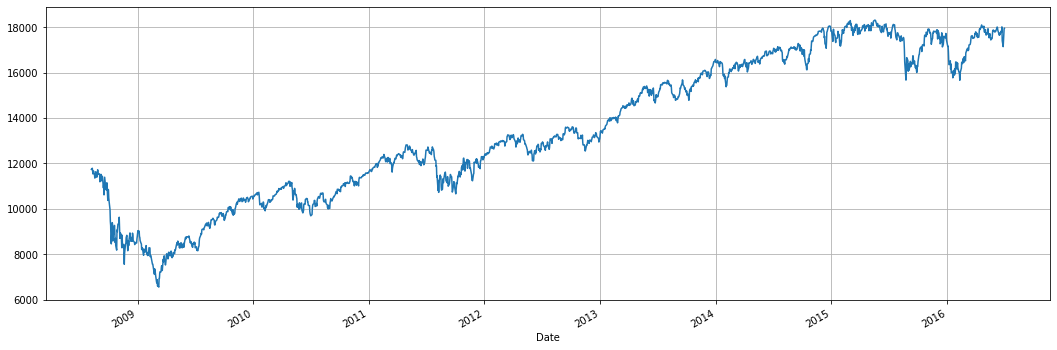

In [7]:
df.set_index('Date')["Adj Close"].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3b07ebf10>,
      dtype=object)

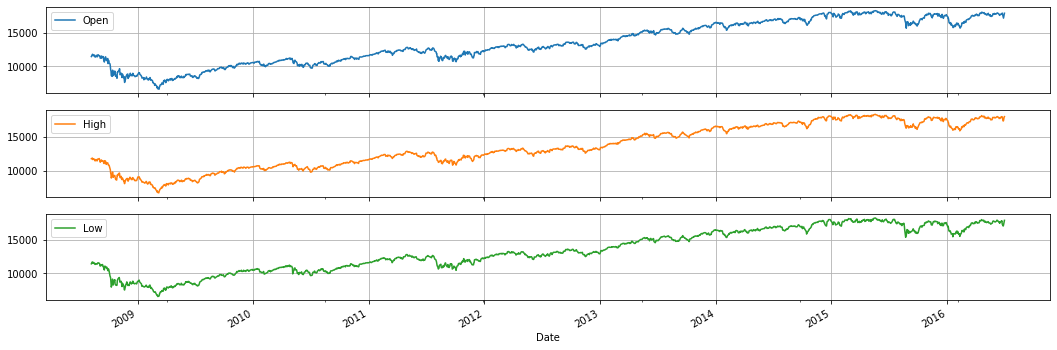

In [8]:
df.set_index('Date')[["Open", "High", "Low"]].plot(subplots=True)

In [9]:
df_input = df.drop(columns=["Date"])
df_input.head()

,Adj Close,Label,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu
0,11734.320312,1,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,11782.349609,0,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,11642.469727,0,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,11532.959961,1,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,11615.929688,1,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.094,0.717


In [10]:
df_input.describe()

,Adj Close,Label,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu
count,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,13463.032255,0.535445,13459.116048,13541.303173,13372.931728,1.628110e+08,0.361426,0.022722,-0.957369,0.162315,0.065675,0.772018
std,3144.006996,0.498867,3143.281634,3136.271725,3150.420934,9.392343e+07,0.060884,0.053687,0.199673,0.038575,0.020968,0.041819
min,6547.049805,0.000000,6547.009766,6709.609863,6469.950195,8.410000e+06,0.161332,-0.225978,-0.999500,0.059000,0.007000,0.588000
25%,10913.379883,0.000000,10907.339844,11000.980469,10824.759766,1.000000e+08,0.321410,-0.011461,-0.996400,0.135000,0.051000,0.746000
50%,13025.580078,1.000000,13022.049805,13088.110352,12953.129883,1.351700e+08,0.361652,0.024870,-0.993200,0.159000,0.064000,0.773000
75%,16478.410156,1.000000,16477.699219,16550.070312,16392.769531,1.926000e+08,0.400533,0.057980,-0.985500,0.188000,0.079000,0.802000
max,18312.390625,1.000000,18315.060547,18351.359375,18272.560547,6.749200e+08,0.615242,0.195774,0.991700,0.316000,0.153000,0.894000


In [11]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_input)

In [12]:
features = df_scaled
target = df_scaled[:,1]

<center>features is a 2D list, target is a 1D list

In [13]:
def plotHist(history : tf.keras.callbacks.History, val : str):
    plt.plot(history.history[val])
    plt.plot(history.history["val_" + val])
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'test'], loc='upper left')

In [14]:
len(features), len(features[0]), len(target)

(1989, 12, 1989)

In [15]:
df_input.head()

,Adj Close,Label,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu
0,11734.320312,1,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,11782.349609,0,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,11642.469727,0,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,11532.959961,1,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,11615.929688,1,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.094,0.717


In [16]:
features[0]

array([4.40894198e-01, 1.00000000e+00, 4.15113783e-01, 4.33813671e-01,
       4.16695095e-01, 3.06702075e-01, 2.34004623e-01, 4.20649400e-01,
       6.52872640e-04, 6.84824903e-01, 2.32876712e-01, 4.44444444e-01])

In [17]:
target[0:2]

array([1., 0.])

In [18]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42, shuffle=False)

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1491, 12), (498, 12), (1491,), (498,))

In [20]:
win_len = 30
batch_size = 32
num_features = 12
train_generator = TimeseriesGenerator(x_train, y_train, length=win_len, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_len, sampling_rate=1, batch_size=batch_size)

In [21]:
print("number of batches in training set :", len(train_generator))
print("number of batches in testing set :", len(test_generator))
print("batch size :", len(train_generator[0][0]))
print("window size :", len(train_generator[0][0][0]))
print("number of features :", len(train_generator[0][0][0][0]))

number of batches in training set : 46
number of batches in testing set : 15
batch size : 32
window size : 30
number of features : 12


<center><h2>Making the Transformer model

In [22]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = tf.keras.layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = tf.keras.layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(res)
    x = tf.keras.layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = tf.keras.layers.Dropout(dropout)(x)
    x = tf.keras.layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = tf.keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = tf.keras.layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = tf.keras.layers.Dense(dim, activation="relu")(x)
        x = tf.keras.layers.Dropout(mlp_dropout)(x)
    outputs = tf.keras.layers.Dense(1)(x)
    return tf.keras.Model(inputs, outputs)

<center><h3>Model 1

In [23]:
input_shape = (win_len, num_features)

model1 = build_model(input_shape, head_size=256, num_heads=4, ff_dim=4, num_transformer_blocks=4, mlp_units=[128], 
                    mlp_dropout=0.4,dropout=0.25)

In [24]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30, 12)]     0           []                               
                                                                                                  
 layer_normalization (LayerNorm  (None, 30, 12)      24          ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 30, 12)      52236       ['layer_normalization[0][0]',    
 dAttention)                                                      'layer_normalization[0][0]']    
                                                                                              

In [25]:
filepath = "clas_logs"
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode = "min")
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath+"\model1.hdf5", monitor = "val_accuracy", verbose = 1, save_best_only=True, mode = "max")

model1.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer=tf.optimizers.Adam(), metrics = ["accuracy"])

In [26]:
# history = model1.fit()
history = model1.fit_generator(train_generator, epochs=500, validation_data=test_generator, shuffle=False, callbacks=[checkpoint])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/500
46/46 [==============================] - ETA: 0s - loss: 2.5816 - accuracy: 0.5195
Epoch 1: val_accuracy improved from -inf to 0.51496, saving model to clas_logs\model1.hdf5
46/46 [==============================] - 13s 37ms/step - loss: 2.5816 - accuracy: 0.5195 - val_loss: 7.3965 - val_accuracy: 0.5150
Epoch 2/500
44/46 [===========================>..] - ETA: 0s - loss: 3.4910 - accuracy: 0.5114
Epoch 2: val_accuracy did not improve from 0.51496
46/46 [==============================] - 1s 20ms/step - loss: 3.4291 - accuracy: 0.5051 - val_loss: 1.1387 - val_accuracy: 0.4850
Epoch 3/500
46/46 [==============================] - ETA: 0s - loss: 2.1076 - accuracy: 0.5120
Epoch 3: val_accuracy did not improve from 0.51496
46/46 [==============================] - 1s 20ms/step - loss: 2.1076 - accuracy: 0.5120 - val_loss: 0.8894 - val_accuracy: 0.4850
Epoch 4/500
45/46 [============================>.] - ETA: 0s - loss: 1.2054 - accuracy: 0.5083
Epoch 4: val_accuracy improved from 

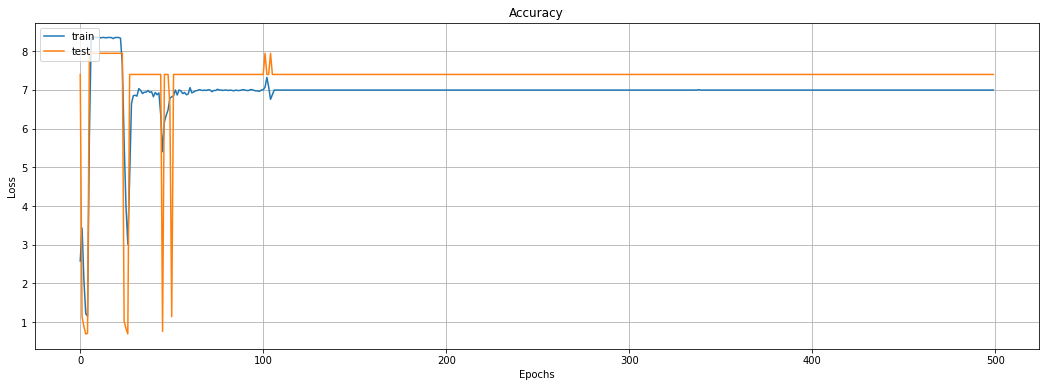

In [27]:
plotHist(history, "loss")

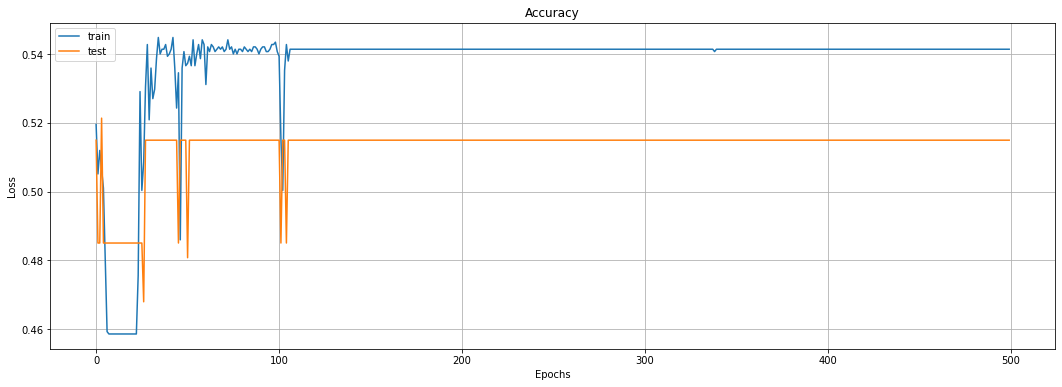

In [28]:
plotHist(history, "accuracy")

In [31]:
model1 = tf.keras.models.load_model("/content/clas_logs\model1.hdf5")

In [32]:
predictions = model1.predict(test_generator)

15/15 [==============================] - 1s 6ms/step


In [33]:
predictions

array([[0.49025583],
       [0.5691159 ],
       [0.47406   ],
       [0.5144795 ],
       [0.5117658 ],
       [0.54769695],
       [0.52417076],
       [0.48997888],
       [0.50442535],
       [0.5678146 ],
       [0.508131  ],
       [0.5509618 ],
       [0.5307672 ],
       [0.47099188],
       [0.56188166],
       [0.5139838 ],
       [0.5125375 ],
       [0.5360035 ],
       [0.54639846],
       [0.5275662 ],
       [0.52931356],
       [0.5235117 ],
       [0.5445008 ],
       [0.47072476],
       [0.4907159 ],
       [0.4919728 ],
       [0.4609087 ],
       [0.5047648 ],
       [0.41215336],
       [0.4595322 ],
       [0.49176407],
       [0.4710005 ],
       [0.47615796],
       [0.49271333],
       [0.4621929 ],
       [0.5183671 ],
       [0.4847251 ],
       [0.5145487 ],
       [0.4524294 ],
       [0.48918787],
       [0.47088045],
       [0.44183606],
       [0.49572098],
       [0.48349988],
       [0.48515478],
       [0.49949846],
       [0.4909861 ],
       [0.508

In [34]:
predictions.shape

(468, 1)

In [35]:
x_test[:,1][win_len:].shape

(468,)

In [36]:
df_pred = pd.concat([pd.DataFrame(np.round(predictions)), pd.DataFrame(x_test[:,1][win_len:])], axis = 1)
df_pred.columns = ["Pred", "Actual"]
df_pred.head()

,Pred,Actual
0,0.0,1.0
1,1.0,1.0
2,0.0,0.0
3,1.0,1.0
4,1.0,0.0


In [37]:
#function to print accuracy and MCC of the model
def evaluation(df : pd.DataFrame):
    conf = pd.crosstab(df["Actual"], df["Pred"])
    fig = plt.figure(figsize = (6,4))
    sn.heatmap(conf, annot = True, cmap = "Blues", fmt = "g")
    plt.title("Confussion Matrix")
    fig.tight_layout()
    plt.show()
    TP = conf[1][1]
    FN = conf[0][1]
    FP = conf[1][0]
    TN = conf[0][0]
    Acc = (TP+TN)/(TP+TN+FN+FP)
    Mcc = (TP*TN - FP*FN) / np.sqrt( (TP + FP)*(TP + FN)*(TN + FP)*(TN + FN) )
    print("Accuracy =",Acc)
    print("MCC =",Mcc)


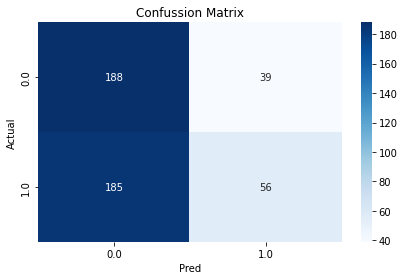

Accuracy = 0.5213675213675214
MCC = 0.07524606050562324


In [38]:
evaluation(df_pred)

<center><h3>Model 2

In [39]:
input_shape = (win_len, num_features)

model2 = build_model(input_shape, head_size=512, num_heads=6, ff_dim=4, num_transformer_blocks=4, mlp_units=[256], 
                    mlp_dropout=0.4,dropout=0.25)

In [40]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 30, 12)]     0           []                               
                                                                                                  
 layer_normalization_8 (LayerNo  (None, 30, 12)      24          ['input_2[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 multi_head_attention_4 (MultiH  (None, 30, 12)      156684      ['layer_normalization_8[0][0]',  
 eadAttention)                                                    'layer_normalization_8[0][0]']  
                                                                                            

In [41]:
filepath = "clas_logs"
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode = "min")
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath+"\model2.hdf5", monitor = "val_accuracy", verbose = 1, save_best_only=True, mode = "max")

model2.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer=tf.optimizers.Adam(), metrics = ["accuracy"])

In [42]:
# history = model1.fit()
history = model2.fit_generator(train_generator, epochs=500, validation_data=test_generator, shuffle=False, callbacks=[checkpoint])

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


45/46 [============================>.] - ETA: 0s - loss: 2.4829 - accuracy: 0.5188
Epoch 1: val_accuracy improved from -inf to 0.51496, saving model to clas_logs\model2.hdf5
46/46 [==============================] - 6s 45ms/step - loss: 2.4767 - accuracy: 0.5202 - val_loss: 0.9136 - val_accuracy: 0.5150
Epoch 2/500
44/46 [===========================>..] - ETA: 0s - loss: 4.5413 - accuracy: 0.4709
Epoch 2: val_accuracy did not improve from 0.51496
46/46 [==============================] - 1s 28ms/step - loss: 4.4825 - accuracy: 0.4723 - val_loss: 1.0786 - val_accuracy: 0.4850
Epoch 3/500
45/46 [============================>.] - ETA: 0s - loss: 3.5009 - accuracy: 0.4701
Epoch 3: val_accuracy did not improve from 0.51496
46/46 [==============================] - 1s 28ms/step - loss: 3.4617 - accuracy: 0.4709 - val_loss: 1.0380 - val_accuracy: 0.4850
Epoch 4/500
46/46 [==============================] - ETA: 0s - loss: 2.4522 - accuracy: 0.4921
Epoch 4: val_accuracy did not improve from 0.5149

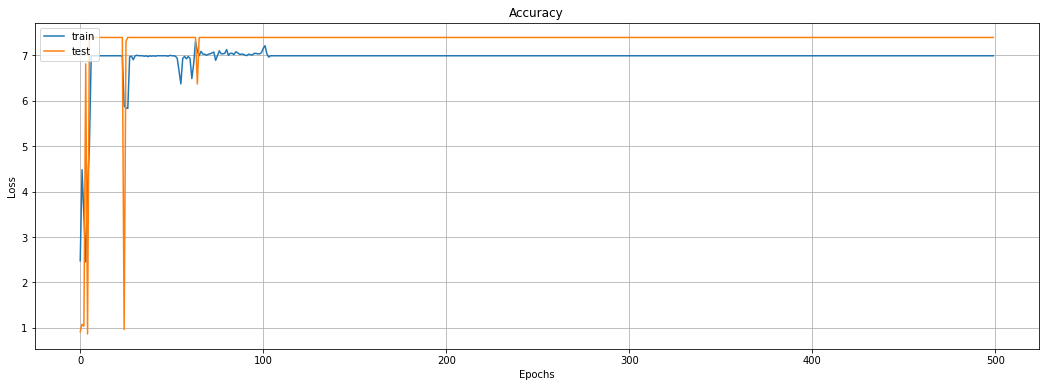

In [43]:
plotHist(history, "loss")

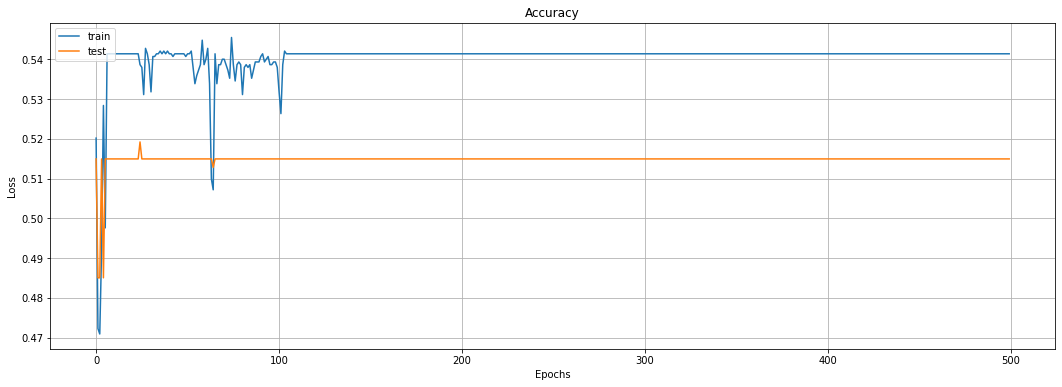

In [44]:
plotHist(history, "accuracy")

In [46]:
model2 = tf.keras.models.load_model("/content/clas_logs\model2.hdf5")

In [47]:
predictions = model2.predict(test_generator)

15/15 [==============================] - 1s 12ms/step


In [48]:
predictions

array([[0.5604003 ],
       [0.5840023 ],
       [0.56813335],
       [0.56071943],
       [0.47787932],
       [0.5365058 ],
       [0.5902235 ],
       [0.5785546 ],
       [0.5498153 ],
       [0.6415742 ],
       [0.53546226],
       [0.6179971 ],
       [0.61814517],
       [0.5368658 ],
       [0.7045175 ],
       [0.67061776],
       [0.7198985 ],
       [0.734953  ],
       [0.8333355 ],
       [0.7881227 ],
       [0.6757453 ],
       [0.71304834],
       [0.7676613 ],
       [0.6678465 ],
       [0.7550792 ],
       [0.68683356],
       [0.64809024],
       [0.6061692 ],
       [0.61877835],
       [0.5434183 ],
       [0.5586975 ],
       [0.57402533],
       [0.57407725],
       [0.61538106],
       [0.5204029 ],
       [0.5324075 ],
       [0.45486426],
       [0.4102744 ],
       [0.41932562],
       [0.53276086],
       [0.5976053 ],
       [0.6085633 ],
       [0.65762895],
       [0.69663244],
       [0.6653266 ],
       [0.6685642 ],
       [0.5787448 ],
       [0.638

In [49]:
predictions.shape

(468, 1)

In [50]:
x_test[:,1][win_len:].shape

(468,)

In [51]:
df_pred = pd.concat([pd.DataFrame(np.round(predictions)), pd.DataFrame(x_test[:,1][win_len:])], axis = 1)
df_pred.columns = ["Pred", "Actual"]
df_pred.head()

,Pred,Actual
0,1.0,1.0
1,1.0,1.0
2,1.0,0.0
3,1.0,1.0
4,0.0,0.0


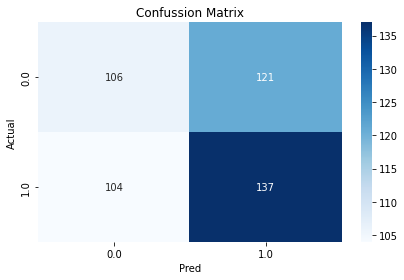

Accuracy = 0.5192307692307693
MCC = 0.03559695278000926


In [52]:
evaluation(df_pred)

<center><h3>Model 3

In [53]:
input_shape = (win_len, num_features)

model3 = build_model(input_shape, head_size=256, num_heads=8, ff_dim=8, num_transformer_blocks=8, mlp_units=[128], 
                    mlp_dropout=0.4,dropout=0.5)

In [54]:
model3.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7fc2dad4db90>>

In [55]:
filepath = "clas_logs"
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode = "min")
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath+"\model3.hdf5", monitor = "val_accuracy", verbose = 1, save_best_only=True, mode = "max")

model3.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer=tf.optimizers.Adam(), metrics = ["accuracy"])

In [56]:
# history = model1.fit()
history = model3.fit_generator(train_generator, epochs=500, validation_data=test_generator, shuffle=False, callbacks=[checkpoint])

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


46/46 [==============================] - ETA: 0s - loss: 4.7775 - accuracy: 0.4908
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to clas_logs\model3.hdf5
46/46 [==============================] - 11s 68ms/step - loss: 4.7775 - accuracy: 0.4908 - val_loss: 0.7977 - val_accuracy: 0.5000
Epoch 2/500
45/46 [============================>.] - ETA: 0s - loss: 6.4495 - accuracy: 0.5271
Epoch 2: val_accuracy improved from 0.50000 to 0.51496, saving model to clas_logs\model3.hdf5
46/46 [==============================] - 2s 48ms/step - loss: 6.4299 - accuracy: 0.5291 - val_loss: 7.3965 - val_accuracy: 0.5150
Epoch 3/500
45/46 [============================>.] - ETA: 0s - loss: 7.0710 - accuracy: 0.5333
Epoch 3: val_accuracy did not improve from 0.51496
46/46 [==============================] - 2s 40ms/step - loss: 7.0424 - accuracy: 0.5352 - val_loss: 7.3965 - val_accuracy: 0.5150
Epoch 4/500
45/46 [============================>.] - ETA: 0s - loss: 7.0449 - accuracy: 0.5375
Epoch

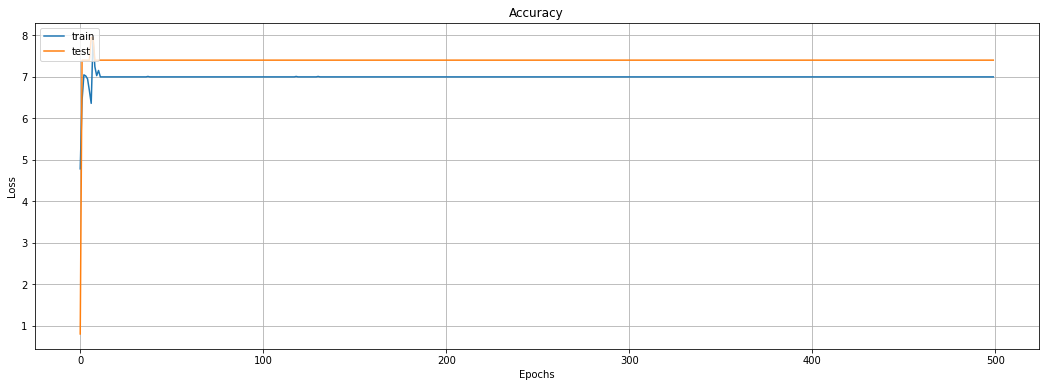

In [57]:
plotHist(history, "loss")

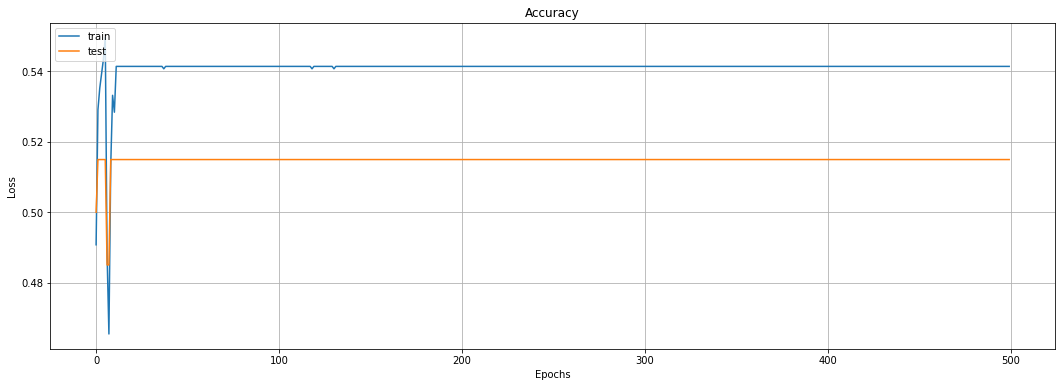

In [58]:
plotHist(history, "accuracy")

In [60]:
model3 = tf.keras.models.load_model("/content/clas_logs\model3.hdf5")

In [61]:
predictions = model3.predict(test_generator)

15/15 [==============================] - 1s 16ms/step


In [62]:
predictions

array([[10.429511 ],
       [10.474612 ],
       [10.441558 ],
       [10.397116 ],
       [10.456991 ],
       [10.458649 ],
       [10.439552 ],
       [10.451434 ],
       [10.518612 ],
       [10.537264 ],
       [10.448792 ],
       [10.443691 ],
       [10.452982 ],
       [10.541955 ],
       [10.503847 ],
       [10.491273 ],
       [10.510905 ],
       [10.531432 ],
       [10.585195 ],
       [10.431409 ],
       [10.420238 ],
       [10.445921 ],
       [10.40034  ],
       [10.41516  ],
       [10.434122 ],
       [10.389135 ],
       [10.351183 ],
       [10.333728 ],
       [10.302179 ],
       [10.337588 ],
       [10.420117 ],
       [10.32033  ],
       [10.400866 ],
       [10.31154  ],
       [10.286184 ],
       [10.400484 ],
       [10.261574 ],
       [10.262381 ],
       [10.237546 ],
       [10.286616 ],
       [10.385968 ],
       [10.286502 ],
       [10.293649 ],
       [10.341728 ],
       [10.325162 ],
       [10.297115 ],
       [10.223784 ],
       [10.17

In [63]:

predictions.shape

(468, 1)

In [64]:
x_test[:,1][win_len:].shape

(468,)

In [65]:
df_pred = pd.concat([pd.DataFrame(np.round(predictions)), pd.DataFrame(x_test[:,1][win_len:])], axis = 1)
df_pred.columns = ["Pred", "Actual"]
df_pred.head()

,Pred,Actual
0,10.0,1.0
1,10.0,1.0
2,10.0,0.0
3,10.0,1.0
4,10.0,0.0


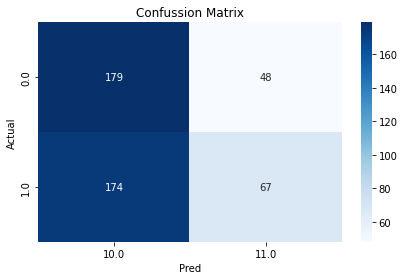

KeyError: ignored

In [66]:
evaluation(df_pred)